In [1]:
import numpy as np
import torch
from collections import deque
from unityagents import UnityEnvironment
import matplotlib.pyplot as plt
from multiagent import MADDPG

## Load Unity environment and get properties

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe", no_graphics=True)

# get env info
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name] 
num_agents = len(env_info.agents)

# size of each action
action_size = brain.vector_action_space_size

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Create a multi-agent DDPG learner

In [3]:
multiagent = MADDPG(state_size, action_size, num_agents)

## Run training

<IPython.core.display.Javascript object>


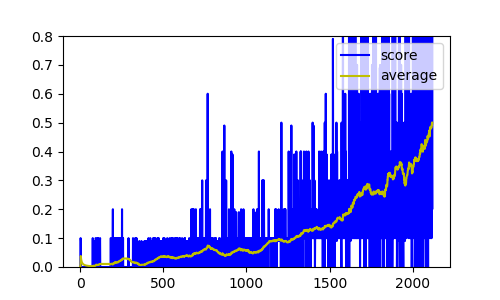

Episode: 100	Average Score: 0.008	Average Steps: 16.2
Episode: 200	Average Score: 0.011	Average Steps: 16.4
Episode: 300	Average Score: 0.025	Average Steps: 21.6
Episode: 400	Average Score: 0.011	Average Steps: 16.3
Episode: 500	Average Score: 0.035	Average Steps: 20.6
Episode: 600	Average Score: 0.035	Average Steps: 21.2
Episode: 700	Average Score: 0.049	Average Steps: 25.9
Episode: 800	Average Score: 0.062	Average Steps: 28.9
Episode: 900	Average Score: 0.042	Average Steps: 24.9
Episode: 1000	Average Score: 0.057	Average Steps: 27.3
Episode: 1100	Average Score: 0.064	Average Steps: 31.1
Episode: 1200	Average Score: 0.096	Average Steps: 36.9
Episode: 1300	Average Score: 0.104	Average Steps: 44.3
Episode: 1400	Average Score: 0.130	Average Steps: 54.1
Episode: 1500	Average Score: 0.143	Average Steps: 54.7
Episode: 1600	Average Score: 0.184	Average Steps: 70.1
Episode: 1700	Average Score: 0.255	Average Steps: 100.1
Episode: 1800	Average Score: 0.261	Average Steps: 102.4
Episode: 1900	Ave

In [4]:
%matplotlib notebook
n_episodes = 10000
print_every = 100
max_t=1000

# Lists for scores
scores = []
avg_scores = []

# List for nr. of steps per episode
step_list = []

# Container for last 100 scores/steps for average calculation
scores_deque = deque(maxlen=100)
steps_deque = deque(maxlen=100)

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)

fig.show()
fig.canvas.draw()


for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations
    multiagent.reset()
    score = np.zeros(num_agents)
    steps = 0
    for t in range(max_t):
        action = multiagent.act(state)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        multiagent.step(state, action, rewards, next_state, dones)
        state = next_state
        score += rewards
        steps+=1
        if np.any(dones):
            break 
            
    scoremax = np.max(score)
    scores_deque.append(scoremax)
    scores.append(scoremax)
    average_score = np.mean(scores_deque)
    avg_scores.append(average_score)
    step_list.append(steps)
    steps_deque.append(steps)
    
    
    ax.clear()
    ax.plot(scores, color= "b", label = "score")
    ax.plot(avg_scores, color="y", label="average")
    ax.legend(loc='upper right')
    ax.set_ylim([0.0, 0.8])
    fig.canvas.draw()
    
    if i_episode % print_every == 0 or average_score > 0.5:
        average_steps = np.mean(steps_deque)
        print('\rEpisode: %d\tAverage Score: %.3f\tAverage Steps: %.1f' % (i_episode, average_score, average_steps))
        torch.save(multiagent.agents[0].state_dict(), "savedata/agent1_episode%d.save" % i_episode)
        torch.save(multiagent.agents[1].state_dict(), "savedata/agent2_episode%d.save" % i_episode)
        
    else:
        print('\rEpisode: %d\tScores: |%.2f %.2f|\tSteps: %d' % (i_episode, score[0], score[1], steps), end="")
        
    if average_score > 0.5:
        break



In [7]:
env.close()

<IPython.core.display.Javascript object>


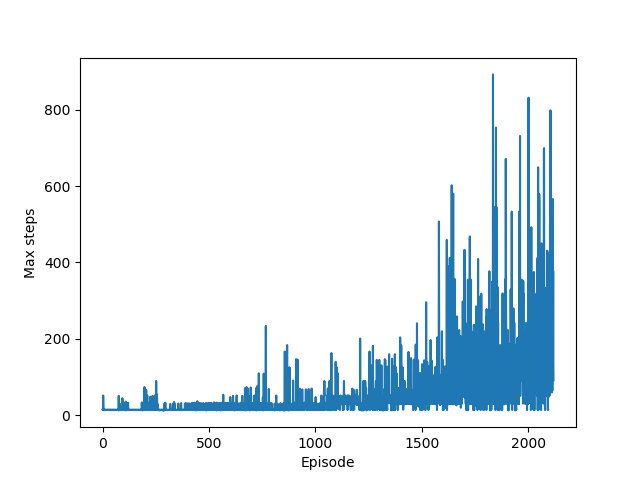

In [11]:
plt.plot(step_list)
plt.xlabel("Episode")
plt.ylabel("Max steps")
plt.show()